In [132]:
import pandas as pd

In [133]:
import numpy as np

In [134]:
df_train = pd.read_csv("PART_I_CRIMES.csv")
print(df_train.head(2))

   LURN_SAK        INCIDENT_DATE  STAT                  STAT_DESC  \
0  18580734  2018-05-16 12:37:51    11  CRIMINAL HOMICIDE: Murder   
1  18587978  2018-05-23 13:50:00    11  CRIMINAL HOMICIDE: Murder   

                               STREET            CITY      ZIP  \
0         1700 LAS VIRGENES CANYON RD       CALABASAS  91302.0   
1  HILLDALE AVE AND SANTA MONICA BLVD  WEST HOLLYWOOD  90069.0   

      INCIDENT_ID  REPORTING_DISTRICT   SEQ    UNIT_ID          UNIT_NAME  \
0  018-02898-1030                1030  2898  CA0190022  MALIBU/LOST HILLS   
1  018-03339-0977                 977  3339  CA0190009     WEST HOLLYWOOD   

  DELETED  
0       N  
1       N  


In [135]:
df_train.head(2)

,LURN_SAK,INCIDENT_DATE,STAT,STAT_DESC,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,UNIT_ID,UNIT_NAME,DELETED
0,18580734,2018-05-16 12:37:51,11,CRIMINAL HOMICIDE: Murder,1700 LAS VIRGENES CANYON RD,CALABASAS,91302.0,018-02898-1030,1030,2898,CA0190022,MALIBU/LOST HILLS,N
1,18587978,2018-05-23 13:50:00,11,CRIMINAL HOMICIDE: Murder,HILLDALE AVE AND SANTA MONICA BLVD,WEST HOLLYWOOD,90069.0,018-03339-0977,977,3339,CA0190009,WEST HOLLYWOOD,N


In [136]:
street = df_train['STREET']
crime = df_train['STAT_DESC']


In [137]:
i = 0 
list1=[]
for i in range(0,len(crime)):
    list1.append(crime[i].split(":",1)[0])

In [138]:
list1

['CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'CRIMINAL HOMICIDE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, MALE 18 AND OVER',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, MALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE, FORCIBLE',
 'RAPE BY FORCE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'RAPE, FORCIBLE',
 

In [139]:
unique_crimes = set(list1)    ####List of unique crimes 
unique_crimes = list(unique_crimes)
unique_crimes

['RAPE BY FORCE, FEMALE UNDER 18',
 'ASSAULT, AGGRAVATED',
 'ASSAULT, FELONY',
 'RAPE BY FORCE, MALE 18 AND OVER',
 'CRIMINAL HOMICIDE',
 'GRAND THEFT VEHICLE (GTA)',
 'ROBBERY, STRONG-ARM',
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18',
 'ARSON',
 'BURGLARY, RESIDENCE',
 'VEHICLE BURGLARY',
 'RAPE, FORCIBLE',
 'THEFT, PETTY',
 'ROBBERY, WEAPON',
 'GRAND THEFT',
 'BURGLARY, OTHER STRUCTURE',
 'RAPE BY FORCE, MALE UNDER 18',
 'LOCKER BURGLARY']

In [140]:
df_train["STAT_DESC"].str.partition(":")[0].head(2)

0    CRIMINAL HOMICIDE
1    CRIMINAL HOMICIDE
Name: 0, dtype: object

In [141]:
i = 0
mappings = {}
for crime in unique_crimes:
    mappings[crime] = i
    i+=1
mappings
    

{'ARSON': 8,
 'ASSAULT, AGGRAVATED': 1,
 'ASSAULT, FELONY': 2,
 'ATTEMPT FORCIBLE RAPE, FEMALE UNDER 18': 7,
 'BURGLARY, OTHER STRUCTURE': 15,
 'BURGLARY, RESIDENCE': 9,
 'CRIMINAL HOMICIDE': 4,
 'GRAND THEFT': 14,
 'GRAND THEFT VEHICLE (GTA)': 5,
 'LOCKER BURGLARY': 17,
 'RAPE BY FORCE, FEMALE UNDER 18': 0,
 'RAPE BY FORCE, MALE 18 AND OVER': 3,
 'RAPE BY FORCE, MALE UNDER 18': 16,
 'RAPE, FORCIBLE': 11,
 'ROBBERY, STRONG-ARM': 6,
 'ROBBERY, WEAPON': 13,
 'THEFT, PETTY': 12,
 'VEHICLE BURGLARY': 10}

In [142]:
df_train['STAT_DESC'].replace(pd.Series(mappings).astype(str), regex=True).str.partition(":")[0].head(2)
### convert to numeric 

0    4
1    4
Name: 0, dtype: object

In [143]:
time = df_train["INCIDENT_DATE"].str.partition(" ")[2]


In [144]:
print(time.head(2))

0    12:37:51
1    13:50:00
Name: 2, dtype: object


Text(0,0.5,'Frequency')

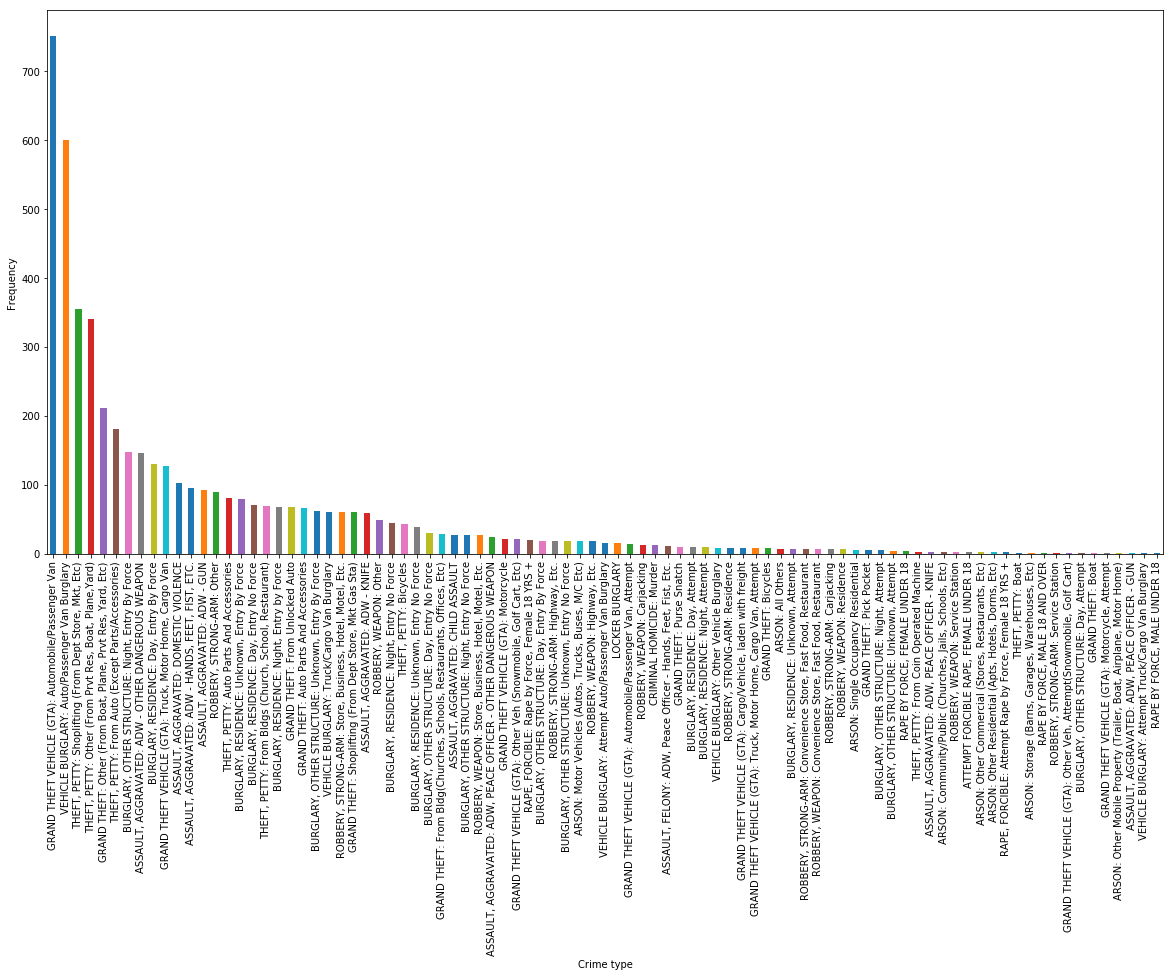

In [184]:
#types of crimes and their frequencies


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
df_train['STAT_DESC'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Crime type')
ax.set_ylabel('Frequency')



#### automobile theft seems to be the most frequent!


In [146]:
len(df_train['STREET'].unique())  #length = 3903

3903

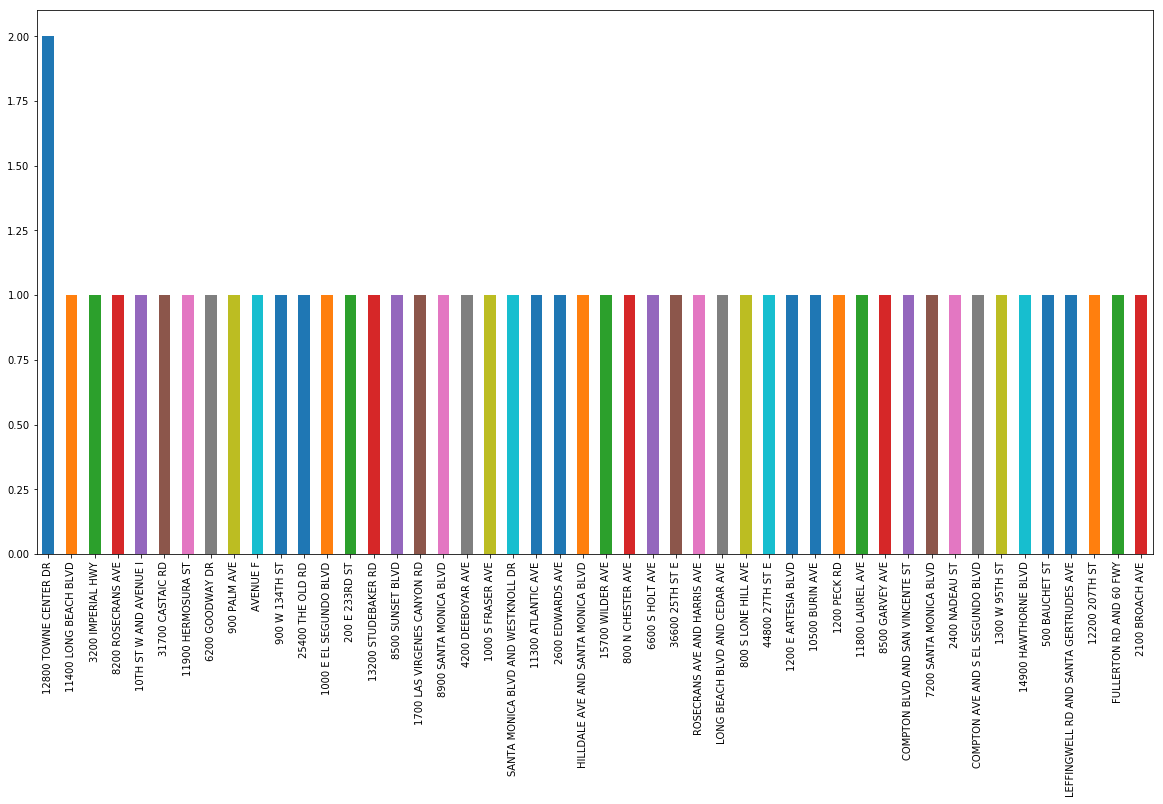

In [181]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'][:50].value_counts().plot(ax=ax, kind='bar')



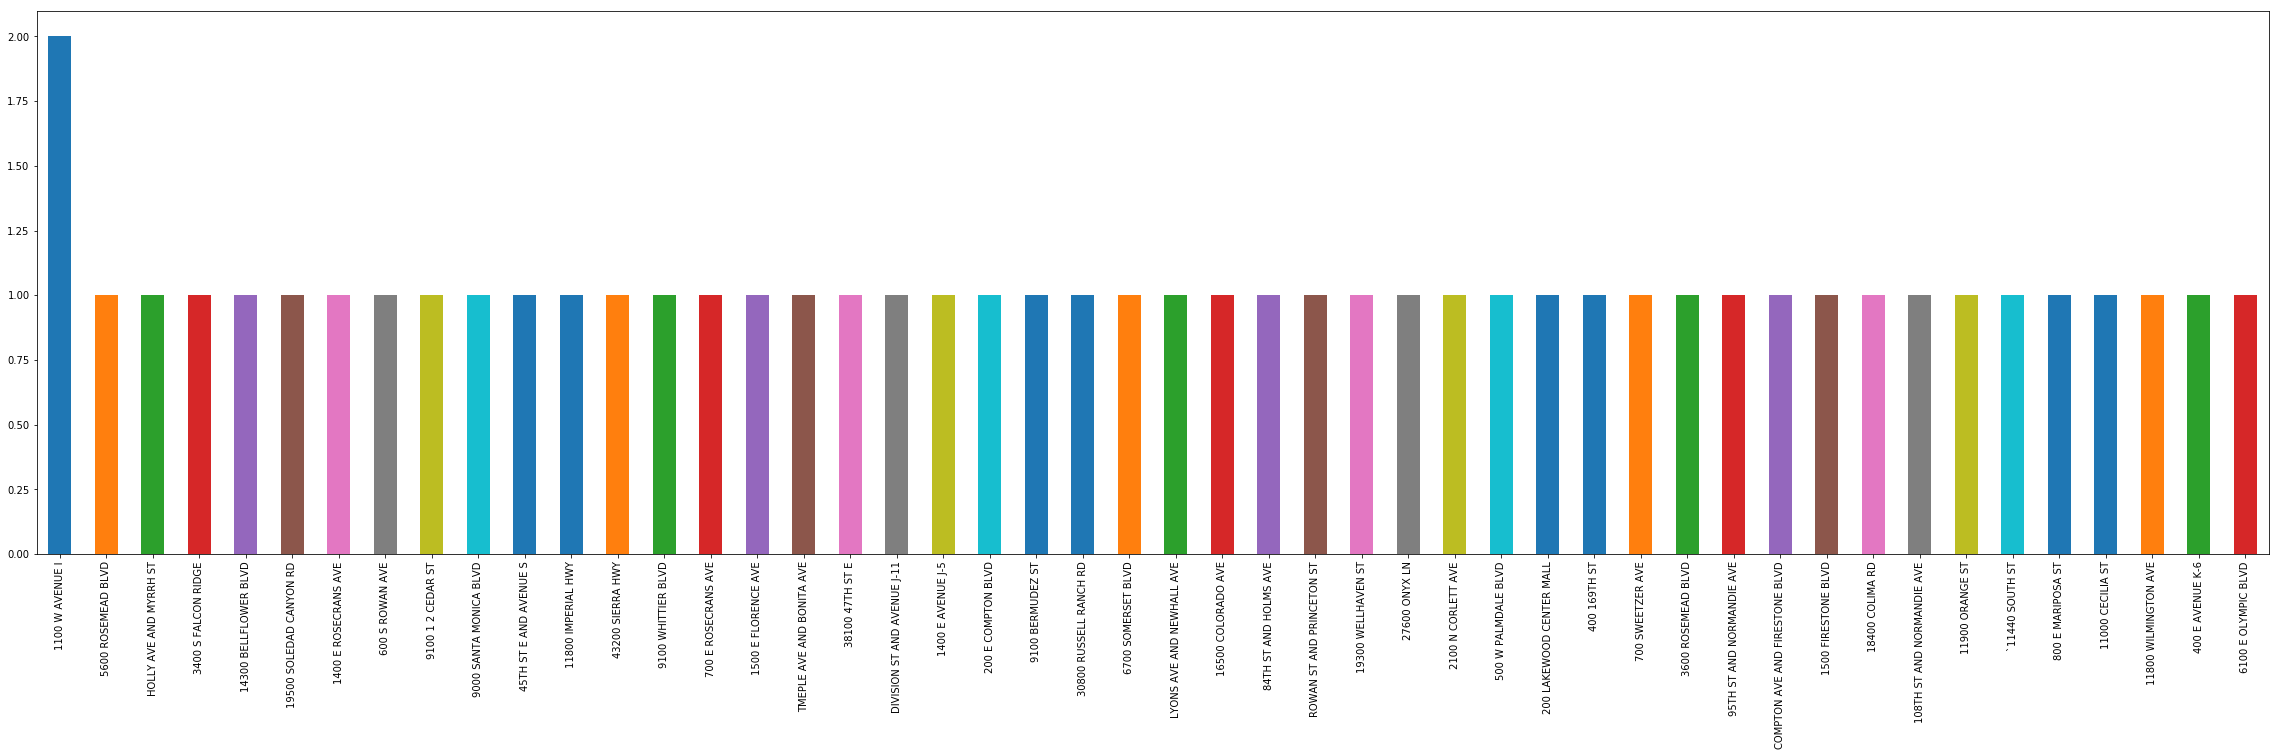

In [148]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(40, 10))
df_train['STREET'][51:100].value_counts().plot(ax=ax, kind='bar')



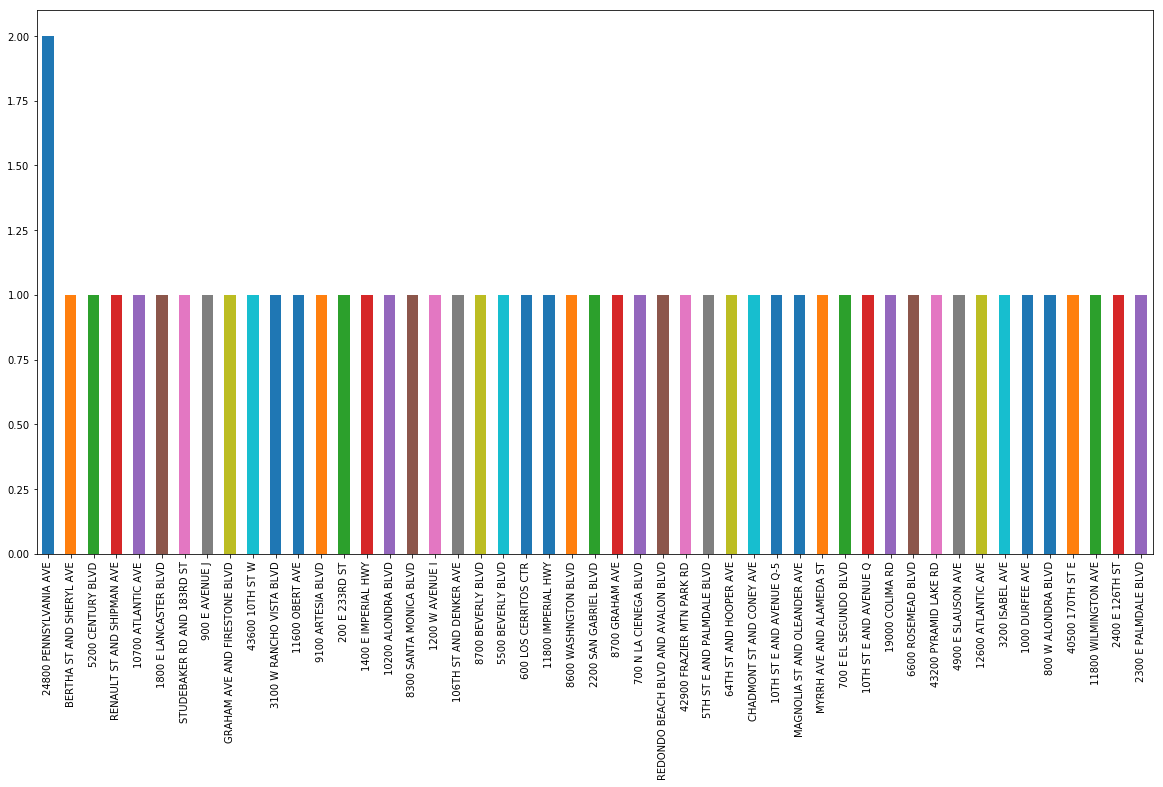

In [179]:
### Location vs crime frequency


fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'][150:200].value_counts().plot(ax=ax, kind='bar')

Text(0,0.5,'Frequency')

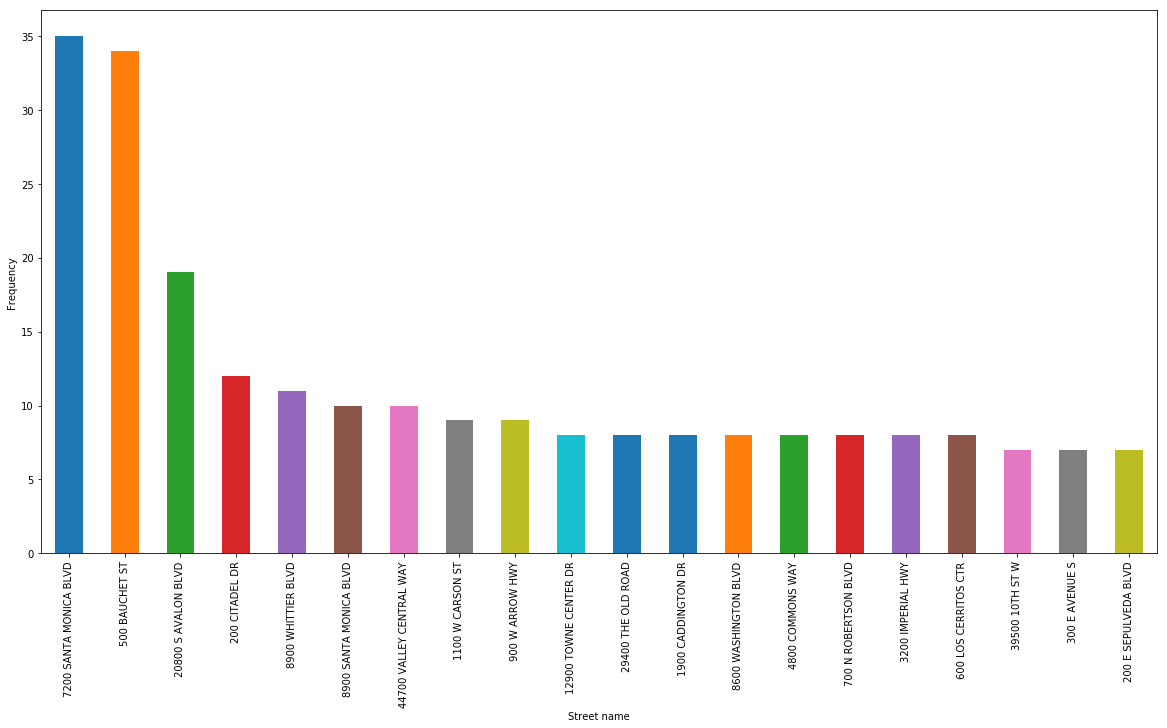

In [190]:
### Location vs crime frequency

fig, ax = plt.subplots(figsize=(20, 10))
df_train['STREET'].value_counts().head(20).plot(ax=ax, kind='bar')
ax.set_xlabel('Street name')
ax.set_ylabel('Frequency')


## streets with crime rate counts. highest first.


In [151]:
df_train['STREET'].value_counts().max()    #### maximum crime rate in the set of cities

35

In [152]:
df_train['STREET'].mode()   ## the street that has the maximum crime rate.

0    7200 SANTA MONICA BLVD
dtype: object

In [186]:
df_train['STREET'].value_counts().head(10)    ### streets with crime rate counts. highest first.

7200 SANTA MONICA BLVD      35
500 BAUCHET ST              34
20800 S AVALON BLVD         19
200 CITADEL DR              12
8900 WHITTIER BLVD          11
8900 SANTA MONICA BLVD      10
44700 VALLEY CENTRAL WAY    10
1100 W CARSON ST             9
900 W ARROW HWY              9
12900 TOWNE CENTER DR        8
Name: STREET, dtype: int64

In [154]:
# Frequency vs Time. --> when did the crimes happen?
df_train['INCIDENT_DATE'].head(2)

0    2018-05-16 12:37:51
1    2018-05-23 13:50:00
Name: INCIDENT_DATE, dtype: object

In [155]:
times = df_train["INCIDENT_DATE"].str.partition(" ")[2] ### extracting time
times.head()


0    12:37:51
1    13:50:00
2    20:38:46
3    21:30:00
4    21:55:00
Name: 2, dtype: object

In [169]:
times.value_counts()   ### as expected, crime rate is high at midnight. (2am,1am,12am and so on)
t = times.value_counts().head(10)
t

02:00:00    74
01:00:00    68
12:00:00    62
02:30:00    61
00:00:00    58
00:30:00    56
03:00:00    56
03:30:00    52
23:00:00    51
17:00:00    49
Name: 2, dtype: int64

In [171]:
times.head(10)

0    12:37:51
1    13:50:00
2    20:38:46
3    21:30:00
4    21:55:00
5    13:48:00
6    16:02:00
7    01:46:00
8    15:08:00
9    17:30:00
Name: 2, dtype: object

In [162]:
t.value_counts().plot(ax=ax, kind='bar')

Text(0,0.5,'Frequency')

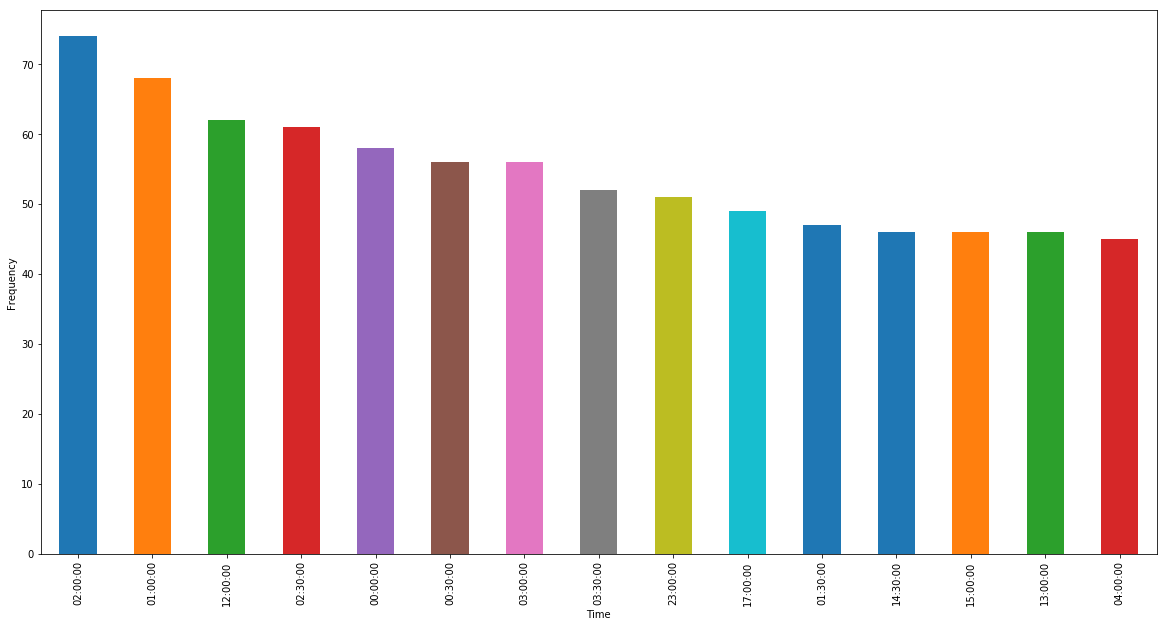

In [187]:
fig, ax = plt.subplots(figsize=(20, 10))
times.value_counts().head(15).plot(ax=ax, kind='bar')       ## time vs frequency
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')

### as expected, crime rate is highest at midnight. (2am,1am,12am and so on)

In [191]:
## converting street names to lat-longs.


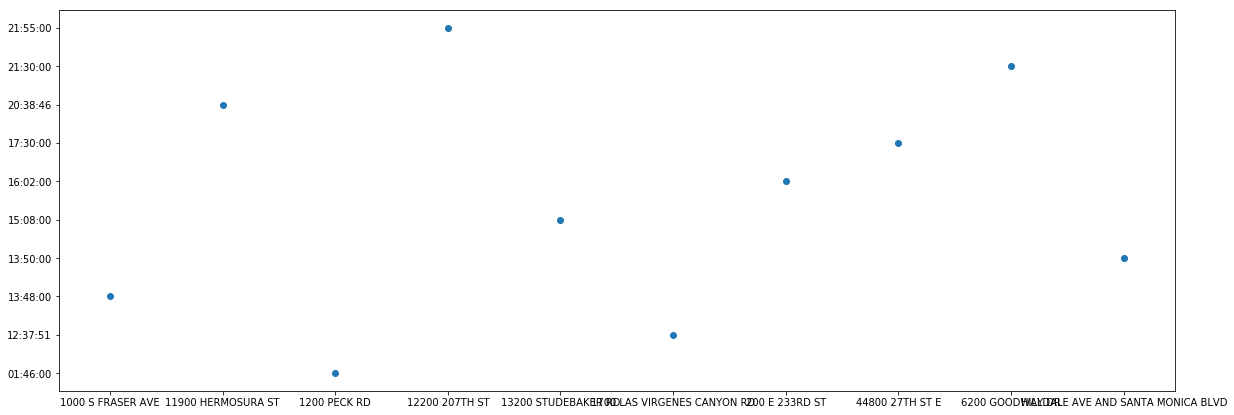

In [209]:
##plot street vs time of crime.
x = df_train['STREET'].head(10)
y = times.head(10)
plt.subplots(figsize=(20, 7))
plt.scatter(x, y)
plt.show()

In [206]:
df_mean = df_train.groupby(['STREET', 'INCIDENT_DATE']).mean().head(10)     ### time of crime at every location.
df_mean

LURN_SAK   STAT      ZIP  \
STREET             INCIDENT_DATE                                     
100 BARKENTINE RD  2018-05-20 14:15:00  18585038.0   65.0  90275.0   
100 CLEAR VISTA DR 2018-06-01 04:45:00  18597398.0   91.0  90274.0   
                   2018-06-01 05:45:00  18597431.0  384.0  90274.0   
100 CRESTVIEW CT   2018-06-04 03:00:00  18599674.0  340.0  91010.0   
100 DAPPLEGRAY LN  2018-06-03 03:00:00  18599024.0  384.0  90274.0   
                   2018-06-03 04:30:00  18598861.0  384.0  90274.0   
                   2018-06-03 07:00:00  18598872.0  384.0  90274.0   
100 DEEP VALLEY DR 2018-05-18 08:30:00  18583120.0   75.0  90274.0   
100 E PINE ST      2018-06-09 18:25:00  18605368.0   91.0  91001.0   
100 GERONIMO LN    2018-06-03 03:49:00  18599867.0   91.0  90745.0   

                                        REPORTING_DISTRICT     SEQ  
STREET             INCIDENT_DATE                                    
100 BARKENTINE RD  2018-05-20 14:15:00              1740.0  1887.0  
100 CLEAR VISTA DR 2018-06-01 04:45:00              1723.0  2056.0  
                   2018-06-01 05:45:00              1723.0  2058.0  
100 CRESTVIEW CT   2018-06-04 03:00:00               543.0  6803.0  
100 DAPPLEGRAY LN  2018-06-03 03:00:00              1721.0  2089.0  
                   2018-06-03 04:30:00              1721.0  2078.0  
                   2018-06-03 07:00:00              1721.0  2080.0  
100 DEEP VALLEY DR 2018-05-18 08:30:00              1724.0  1864.0  
100 E PINE ST      2018-06-09 18:25:00               771.0  1656.0  
100 GERONIMO LN    2018-06-03 03:49:00              1627.0  5802.0